In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
PATH = '/home/kelidan/VVIRAL/data/SEC'

In [56]:
def count_folders(directory, def_count=3):
    folder_count = 0
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)):
            folder_count += 1
    if folder_count > def_count:
        return def_count
    return folder_count

In [57]:
SEROTYPE = 'AAV9'

In [58]:
set_count = count_folders(f'{PATH}/{SEROTYPE}')
SETS = [f'Set {i+1}' for i in range(set_count)]

In [59]:
all_arws = []
for i in SETS:
    arws = []
    DATA_DIR = f'{PATH}/{SEROTYPE}/{i}'
    for root, dirs, files in os.walk(DATA_DIR):
        for file in files:
            if file.endswith(".arw"):
                arws.append(os.path.join(root, file))
    all_arws.append(arws)

In [60]:
all_data = {}
for i in range(len(all_arws)):
    numbers = {}
    for arw in all_arws[i]:
        with open(arw, 'rb') as f:
            run_num = arw.split('/')[-1][8:-4]
            data = pd.read_csv(arw, sep='\t',header=None)
            if run_num != 'Feed':
                numbers[run_num] = data
    all_data[f'Set {i+1}'] = numbers

In [17]:
yields = pd.read_csv(f'{PATH}/{SEROTYPE}/yields.csv')

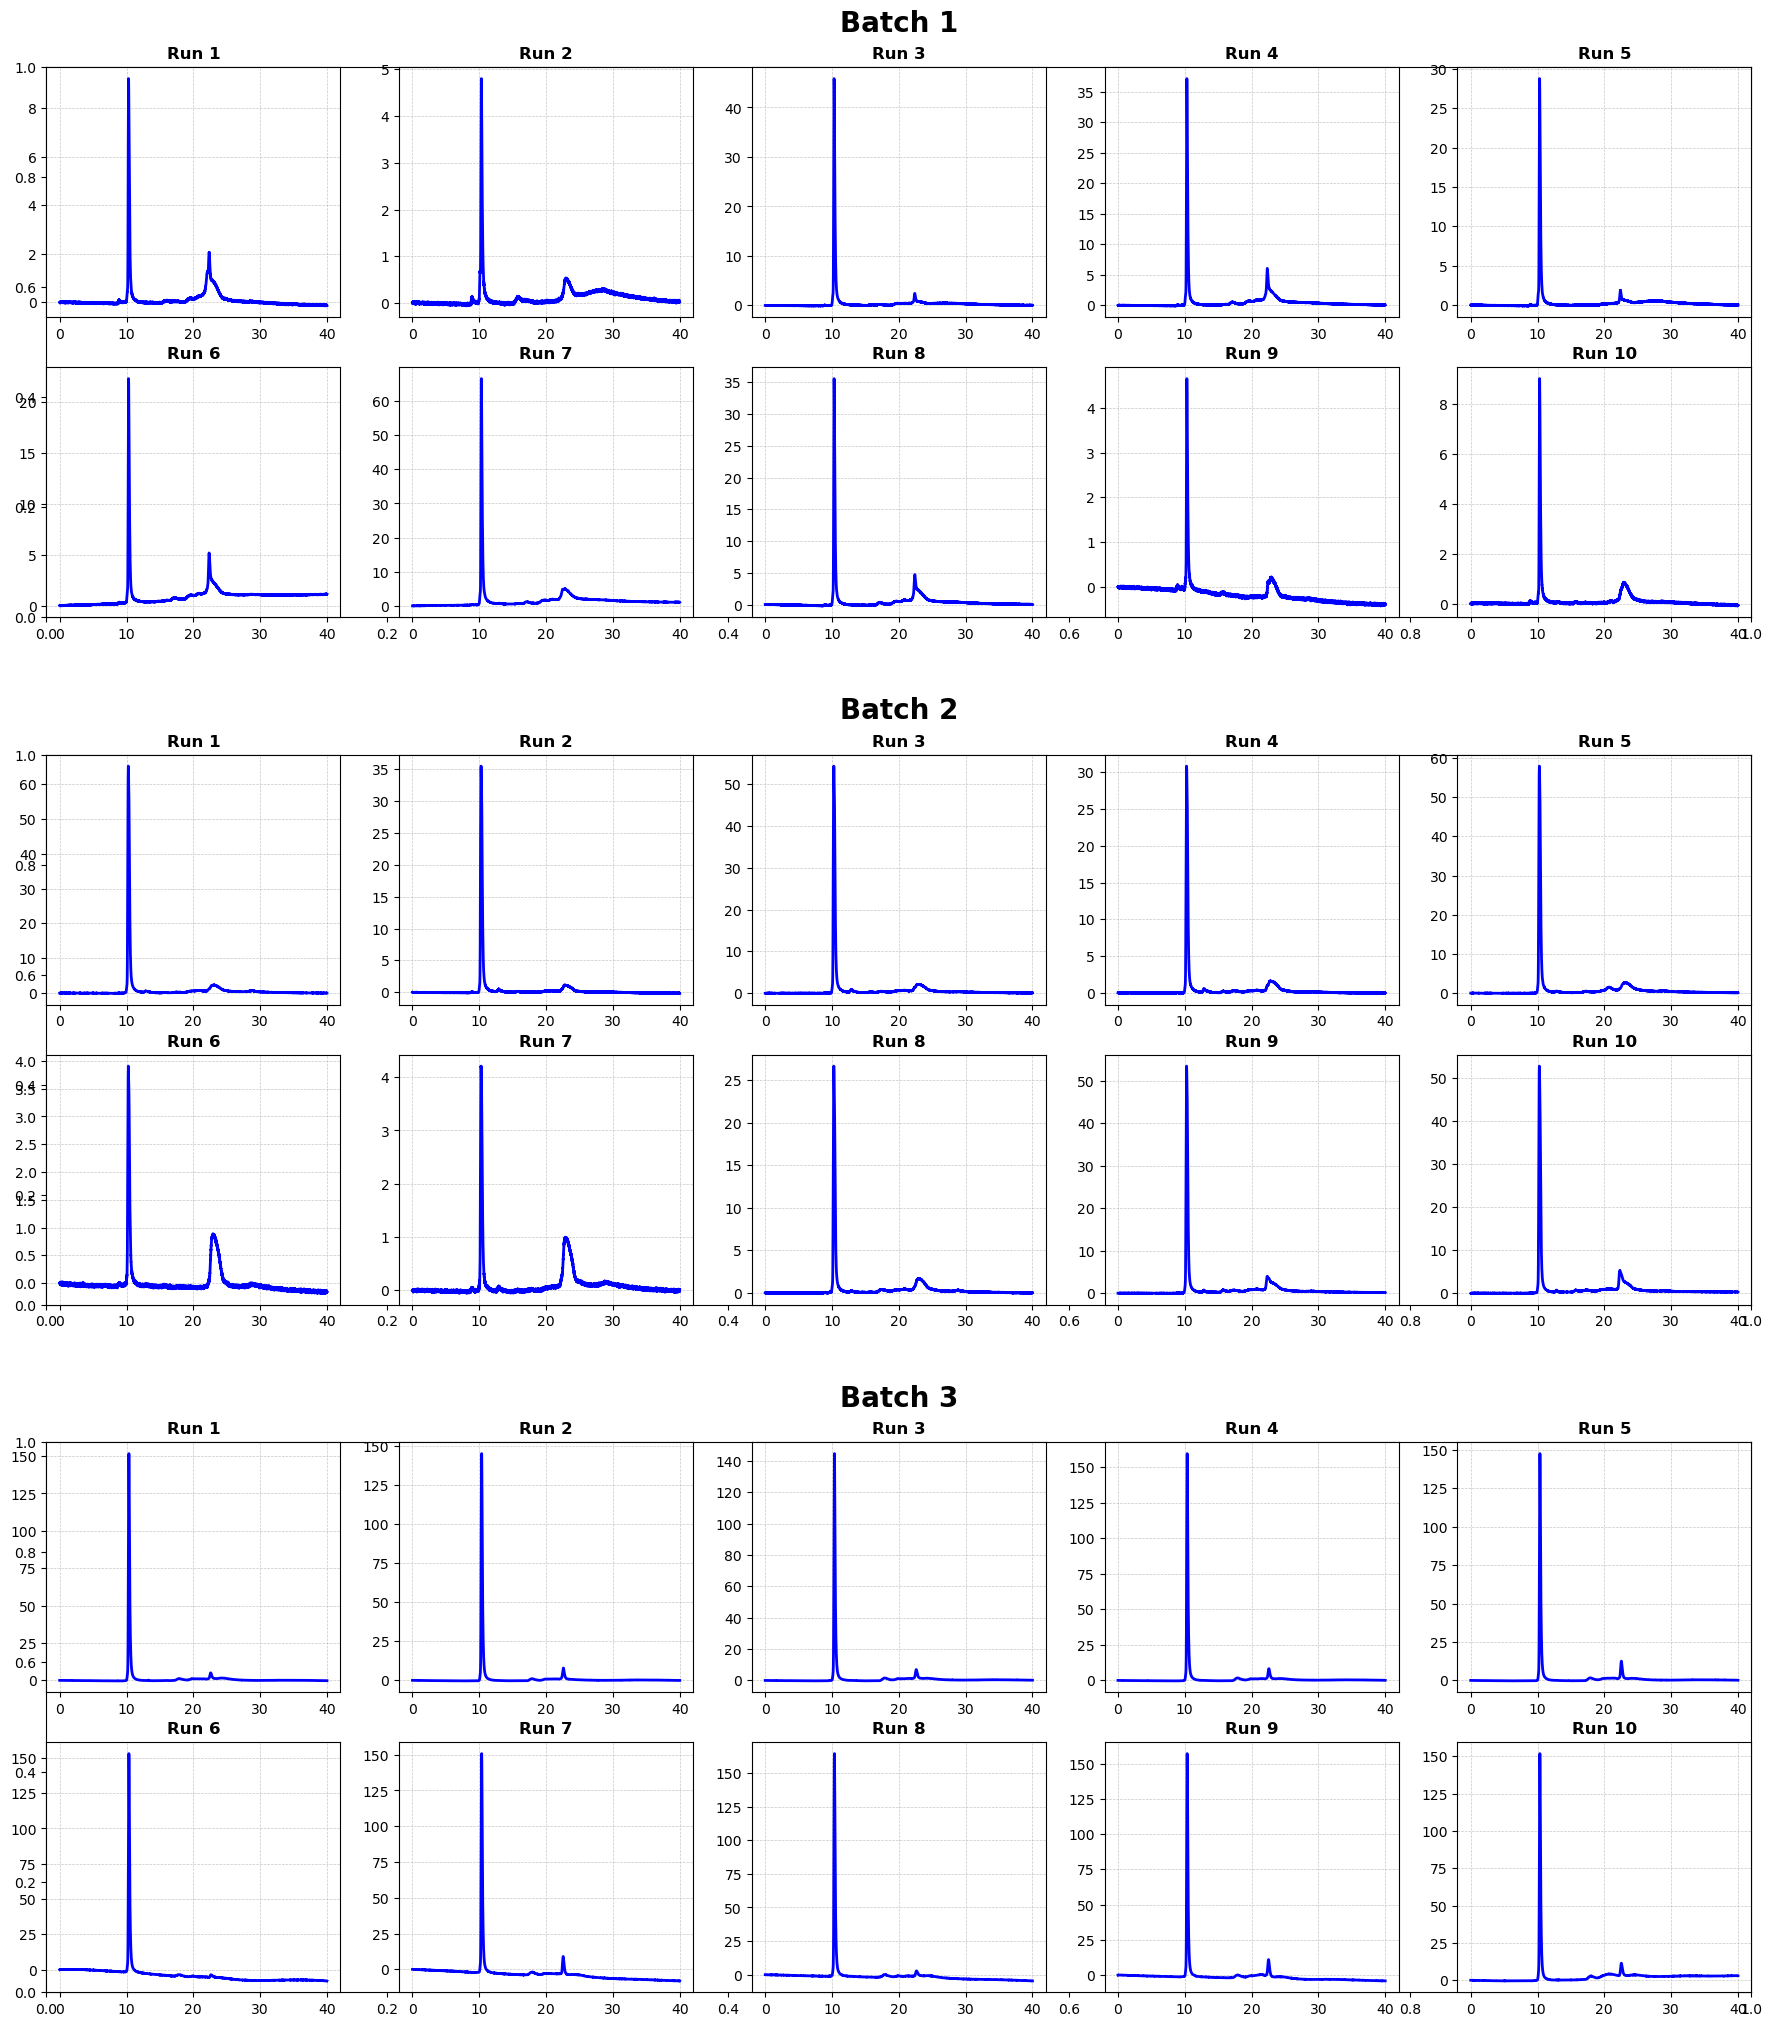

In [54]:

fig = plt.figure(figsize=(22, 25))
outer_gs = gridspec.GridSpec(set_count, 1, hspace=0.25)

# Top Row
for i in range(set_count):
    gs = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=outer_gs[i])
    ax11 = fig.add_subplot(gs[:, :])
    ax11.set_title(f'Batch {i+1}', x=0.5, y=1.05, fontsize=20, fontweight='bold')
    for j in range(10):
        ax = fig.add_subplot(gs[j])
        ax.plot(all_data[f'Set {i+1}'][f'Run {j+1}'][0], all_data[f'Set {i+1}'][f'Run {j+1}'][1], 
                color='blue', linestyle='-', linewidth=2)
        ax.set_title(f'Run {j+1}', fontsize=12, fontweight='bold')
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=10)

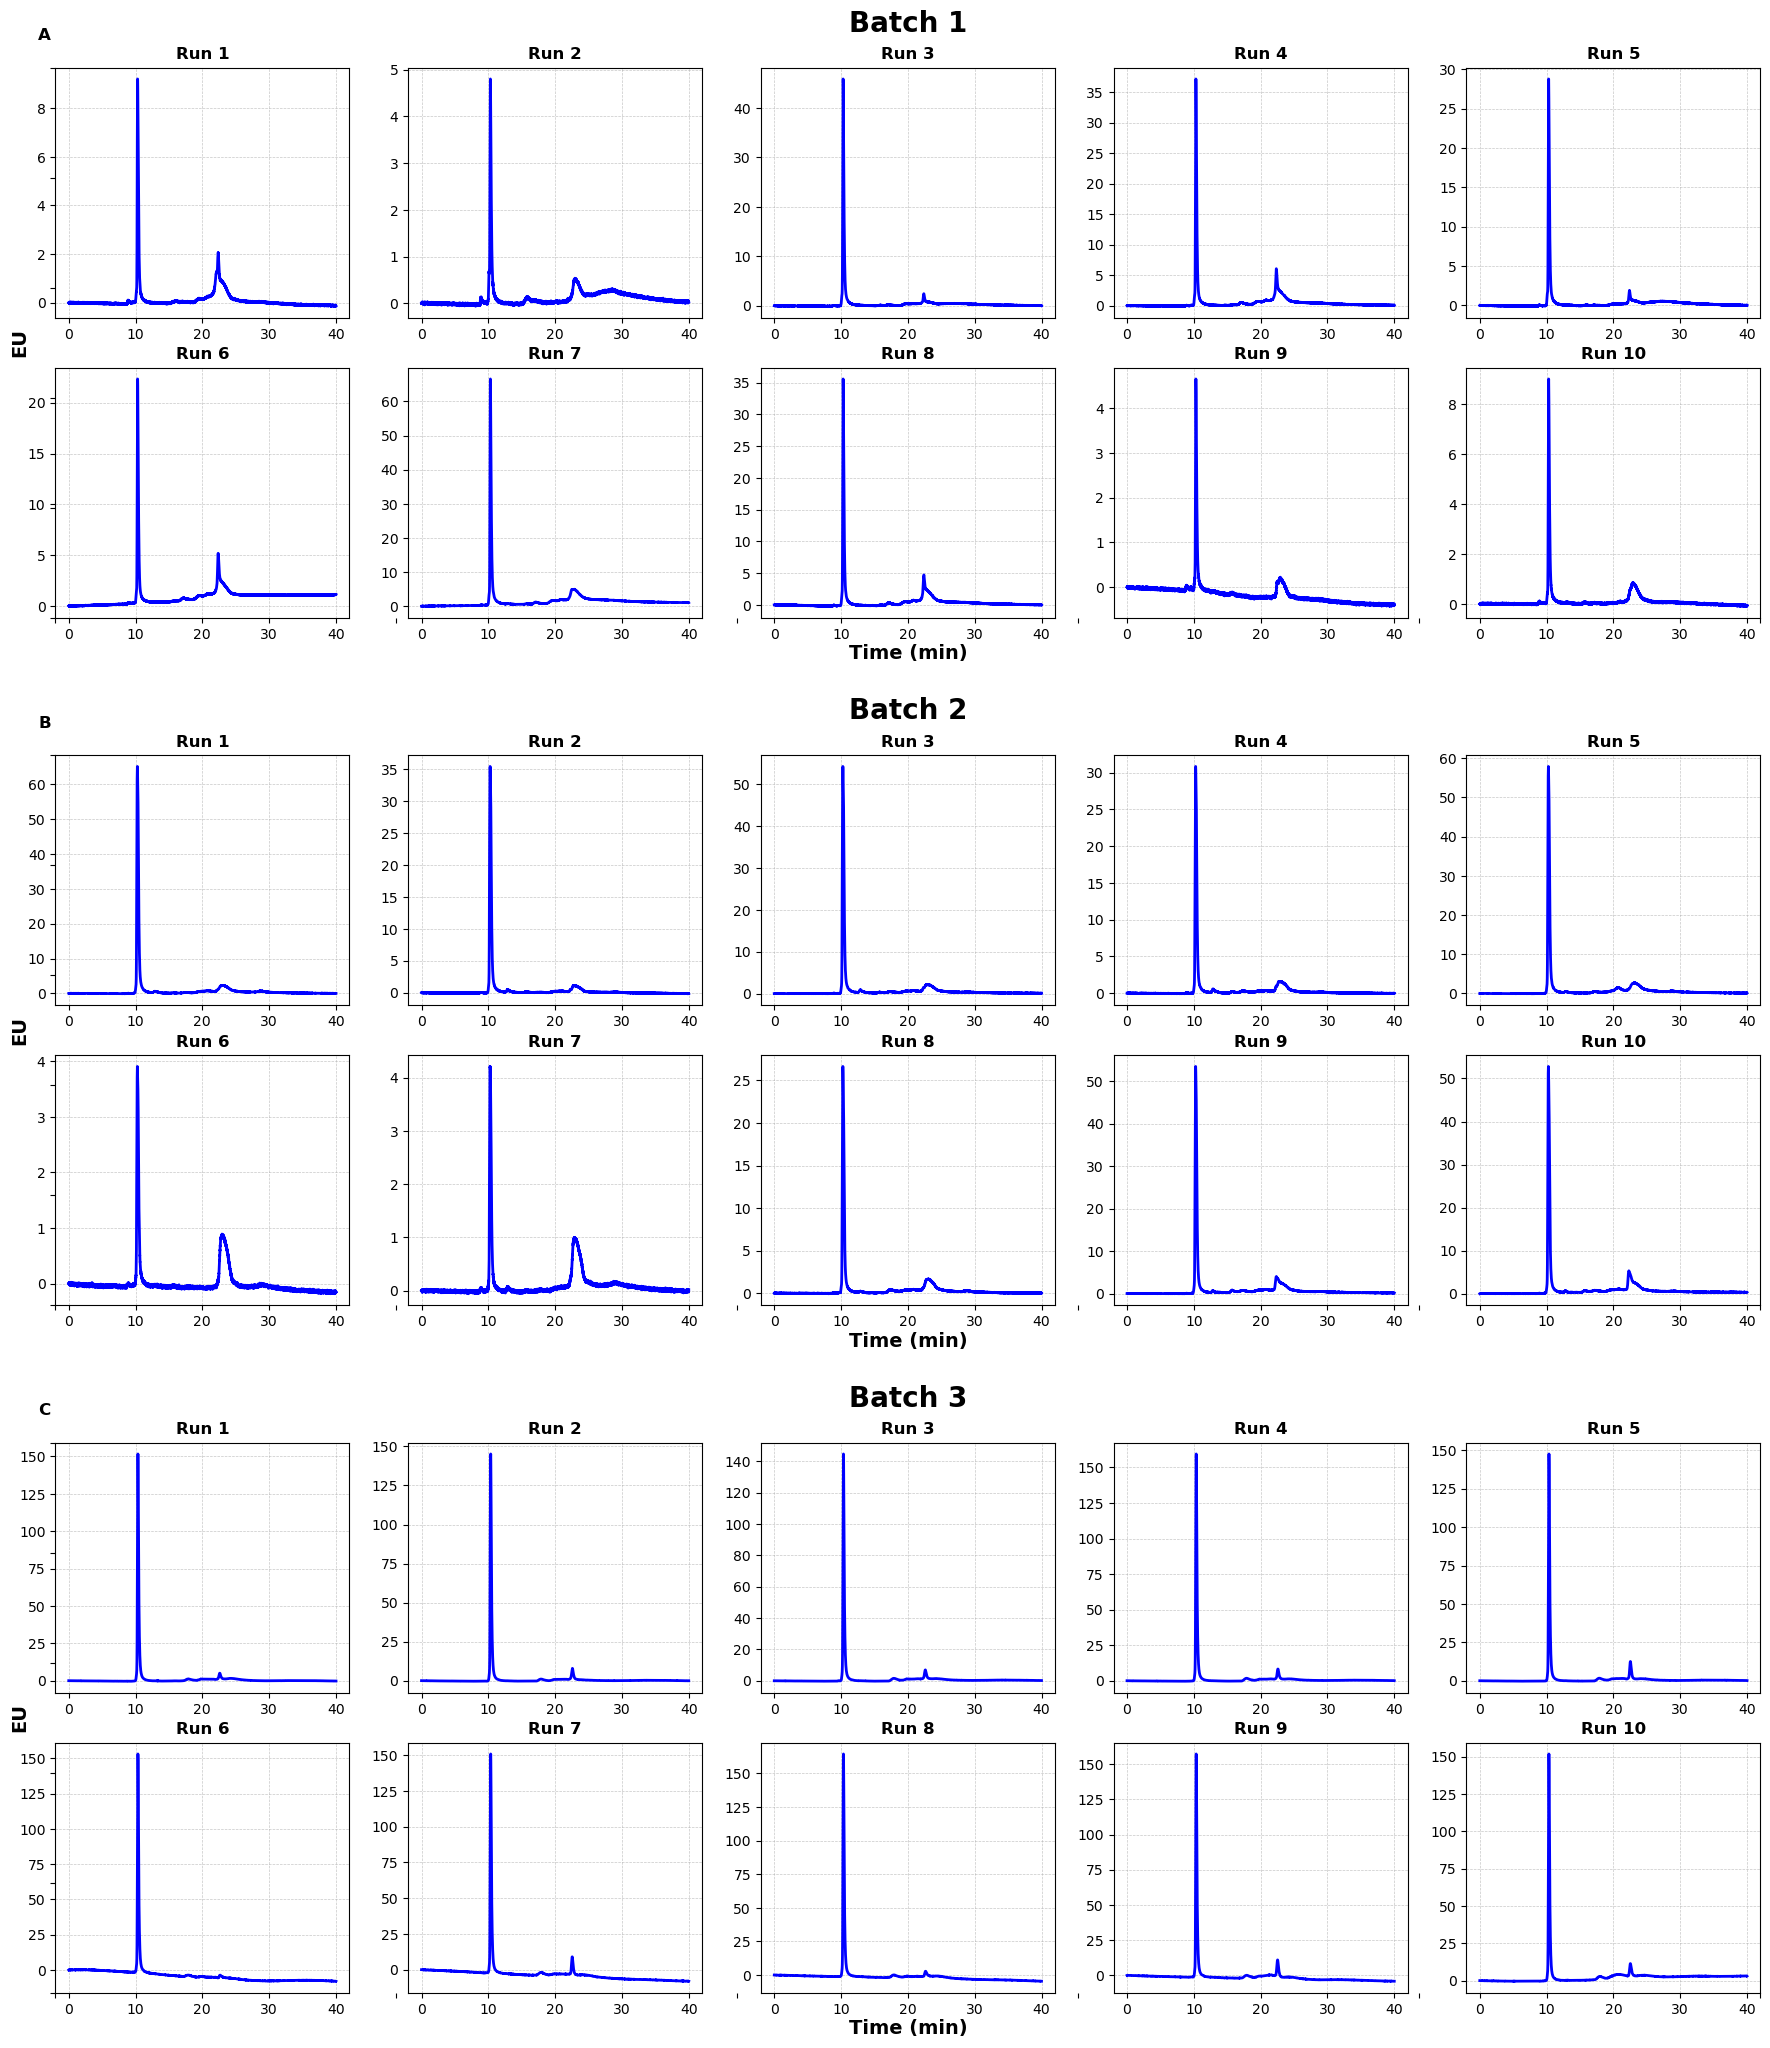

In [41]:

fig = plt.figure(figsize=(22, 25))
outer_gs = gridspec.GridSpec(3, 1, hspace=0.25)

# Top Row
gs_top = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=outer_gs[0, 0])
ax11 = fig.add_subplot(gs_top[:, :])
ax11.set_title('Batch 1', x=0.5, y=1.05, fontsize=20, fontweight='bold')
# ax11.axis('off')
for i in range(10):
    ax = fig.add_subplot(gs_top[i])
    ax.plot(all_data['Set 1'][f'Run {i+1}'][0], all_data['Set 1'][f'Run {i+1}'][1], 
            color='blue', linestyle='-', linewidth=2)
    ax.set_title(f'Run {i+1}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

gs_middle = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=outer_gs[1, 0])
ax21 = fig.add_subplot(gs_middle[:, :])
ax21.set_title('Batch 2', x=0.5, y=1.05, fontsize=20, fontweight='bold')
# ax21.axis('off')
for i in range(10):
    ax = fig.add_subplot(gs_middle[i])
    ax.plot(all_data['Set 2'][f'Run {i+1}'][0], all_data['Set 2'][f'Run {i+1}'][1], 
            color='blue', linestyle='-', linewidth=2)
    ax.set_title(f'Run {i+1}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

gs_bottom = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=outer_gs[2, 0])
ax31 = fig.add_subplot(gs_bottom[:, :])
ax31.set_title('Batch 3', x=0.5, y=1.05, fontsize=20, fontweight='bold')
# ax31.axis('off')
for i in range(10):
    ax = fig.add_subplot(gs_bottom[i])
    ax.plot(all_data['Set 3'][f'Run {i+1}'][0], all_data['Set 3'][f'Run {i+1}'][1], 
            color='blue', linestyle='-', linewidth=2)
    ax.set_title(f'Run {i+1}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

axes = [ax11, ax21, ax31]
letters = ['A', 'B', 'C']
for i in range(3):
    axes[i].set_xlabel('Time (min)', x=0.5, y=0.5, fontdict={'fontsize':14, 'fontweight': 'bold'}, labelpad=12)
    axes[i].set_ylabel('EU', x=-5, y=0.5,  fontdict={'fontsize':14, 'fontweight': 'bold'}, labelpad=12)
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].text(-0.01, 1.05, letters[i], transform=axes[i].transAxes, fontsize=12, fontweight='bold')
fig.savefig('aav2_chroms.png', dpi=600, transparent=True, bbox_inches='tight')

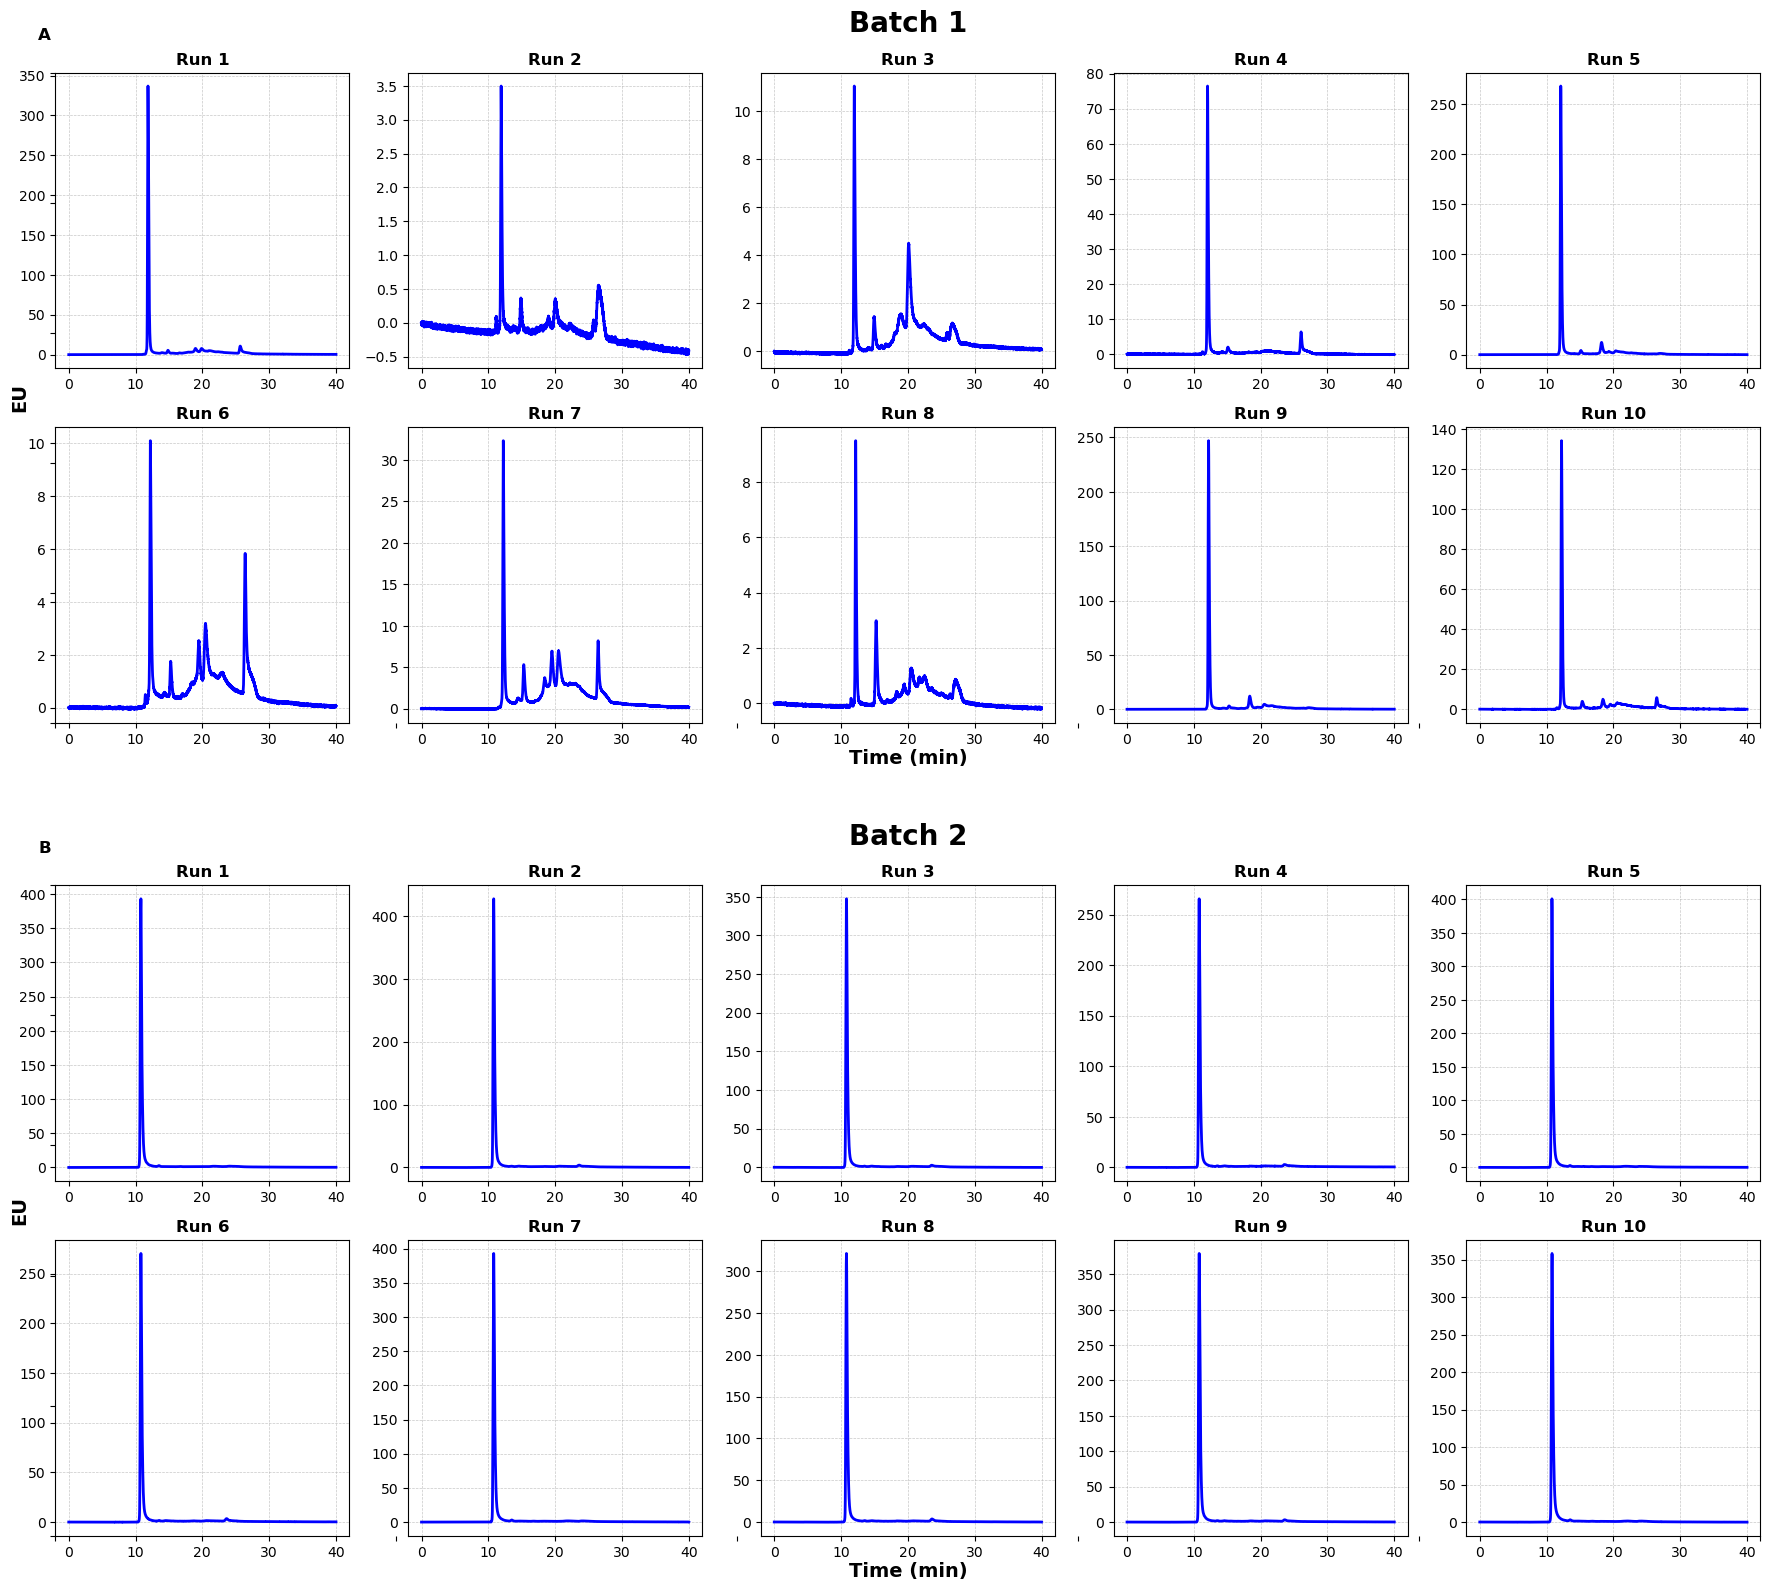

In [66]:

fig = plt.figure(figsize=(22, 19))
outer_gs = gridspec.GridSpec(2, 1, hspace=0.25)

# Top Row
gs_top = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=outer_gs[0, 0])
ax11 = fig.add_subplot(gs_top[:, :])
ax11.set_title('Batch 1', x=0.5, y=1.05, fontsize=20, fontweight='bold')
for i in range(10):
    ax = fig.add_subplot(gs_top[i])
    ax.plot(all_data['Set 1'][f'Run {i+1}'][0], all_data['Set 1'][f'Run {i+1}'][1], 
            color='blue', linestyle='-', linewidth=2)
    ax.set_title(f'Run {i+1}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

gs_bottom = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=outer_gs[1, 0])
ax21 = fig.add_subplot(gs_bottom[:, :])
ax21.set_title('Batch 2', x=0.5, y=1.05, fontsize=20, fontweight='bold')
for i in range(10):
    ax = fig.add_subplot(gs_bottom[i])
    ax.plot(all_data['Set 2'][f'Run {i+1}'][0], all_data['Set 2'][f'Run {i+1}'][1], 
            color='blue', linestyle='-', linewidth=2)
    ax.set_title(f'Run {i+1}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

axes = [ax11, ax21]
letters = ['A', 'B']
for i in range(2):
    axes[i].set_xlabel('Time (min)', x=0.5, y=0.5, fontdict={'fontsize':14, 'fontweight': 'bold'}, labelpad=12)
    axes[i].set_ylabel('EU', x=-5, y=0.5,  fontdict={'fontsize':14, 'fontweight': 'bold'}, labelpad=12)
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].text(-0.01, 1.05, letters[i], transform=axes[i].transAxes, fontsize=12, fontweight='bold')
fig.savefig('aav9_chroms.png', dpi=600, transparent=True, bbox_inches='tight')